In [1]:
#by : Nur Amilah

#Mengimport library yg dibutuhkan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-11 06:03:17--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  28.9MB/s    in 10s     

2020-10-11 06:03:28 (30.0 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# membuat nama directori
base_dir = '/tmp/rockpaperscissors'
paper_dir = os.path.join(base_dir, 'paper')
rock_dir = os.path.join(base_dir,'rock')
scissors_dir = os.path.join(base_dir, 'scissors')
train_dir = os.path.join(base_dir,'train_set')
validation_dir = os.path.join(base_dir, 'validation_set')

# membuat direktori baru
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [5]:
#Menginisialisasi dataset ke folder baru yg telah dibuat
train_paper = os.path.join(train_dir, 'paper')
train_rock = os.path.join(train_dir, 'rock')
train_scissors = os.path.join(train_dir, 'scissors')
validation_paper = os.path.join(validation_dir, 'paper')
validation_rock = os.path.join(validation_dir, 'rock')
validation_scissors = os.path.join(validation_dir, 'scissors')

In [6]:
#Membuat directory yang telah diinisialisasi tadi
os.mkdir(train_paper)
os.mkdir(train_rock)
os.mkdir(train_scissors)
os.mkdir(validation_paper)
os.mkdir(validation_rock)   
os.mkdir(validation_scissors)

In [7]:
# memecah direktori data train dan data validation dengan validasi set 40%
train_paper_dir, validation_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4, random_state=0)

train_rock_dir, validation_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4, random_state=0)

train_scissors_dir, validation_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4, random_state=0)

In [8]:
import shutil

#Menyalin directory paper rock scissors ke directory train_set
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

#Menyalin directory paper rock scissors ke directory validation_set
for i in validation_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(validation_paper,i))
for i in validation_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(validation_rock,i))
for i in validation_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(validation_scissors,i))

In [9]:
os.listdir('/tmp/rockpaperscissors')

['rock',
 'README_rpc-cv-images.txt',
 'validation_set',
 'rps-cv-images',
 'scissors',
 'train_set',
 'paper']

In [11]:
os.listdir('/tmp/rockpaperscissors/train_set')

['rock', 'scissors', 'paper']

In [12]:
os.listdir('/tmp/rockpaperscissors/validation_set')

['rock', 'scissors', 'paper']

In [27]:
#membuat direktori paper pada direktori data train_paper_paper_dir
train_paper_paper_dir = os.path.join(train_dir, 'paper')
 
#membuat direktori rock pada direktori data train_rock_rock_dir
train_rock_rock_dir = os.path.join(train_dir, 'rock')

#membuat direktori scissors pada direktori data train_scissors_scissors_dir
train_scissors_scissors_dir = os.path.join(train_dir, 'scissors')
 
#membuat direktori paper pada direktori data validation_paper_paper_dir
validation_paper_paper_dir = os.path.join(validation_dir, 'paper')
 
#membuat direktori rock pada direktori data validation_rock_rock_dir
validation_rock_rock_dir = os.path.join(validation_dir, 'rock')

#membuat direktori scissors pada direktori data validation_scissors_scissors_dir
validation_scissors_scissors_dir = os.path.join(validation_dir, 'scissors')

In [28]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [29]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [30]:
# membuat model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [31]:
#Model dengan loss = categorical_crossentropy 
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [32]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 7s - loss: 1.1479 - accuracy: 0.3300 - val_loss: 1.0979 - val_accuracy: 0.3000
Epoch 2/20
25/25 - 7s - loss: 1.1043 - accuracy: 0.3900 - val_loss: 1.0996 - val_accuracy: 0.3000
Epoch 3/20
25/25 - 7s - loss: 1.0986 - accuracy: 0.3100 - val_loss: 1.0760 - val_accuracy: 0.4000
Epoch 4/20
25/25 - 7s - loss: 1.0670 - accuracy: 0.4900 - val_loss: 0.9832 - val_accuracy: 0.4000
Epoch 5/20
25/25 - 7s - loss: 0.8563 - accuracy: 0.5900 - val_loss: 0.9690 - val_accuracy: 0.4500
Epoch 6/20
25/25 - 7s - loss: 0.5531 - accuracy: 0.7700 - val_loss: 0.4471 - val_accuracy: 0.8500
Epoch 7/20
25/25 - 7s - loss: 0.5046 - accuracy: 0.8000 - val_loss: 0.4085 - val_accuracy: 0.8500
Epoch 8/20
25/25 - 7s - loss: 0.4584 - accuracy: 0.8200 - val_loss: 0.2915 - val_accuracy: 0.9000
Epoch 9/20
25/25 - 7s - loss: 0.3414 - accuracy: 0.9100 - val_loss: 0.1171 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 7s - loss: 0.3428 - accuracy: 0.8900 - val_loss: 0.3058 - val_accuracy: 0.8000
Epoch 11/20
25/25 -

Saving B3dlyiRDulDJWOsW.png to B3dlyiRDulDJWOsW.png
B3dlyiRDulDJWOsW.png
paper


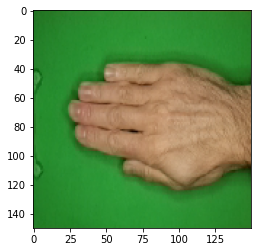

In [37]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]==True:
    print('paper')
  elif classes[0,1]==True:
    print('rock')
  else:
    print('scissors')